## Loading data

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

## Explore dataset

In [3]:
print(train_X.shape, train_y.shape)
print(np.unique(train_y))

(60000, 28, 28) (60000,)
[0 1 2 3 4 5 6 7 8 9]


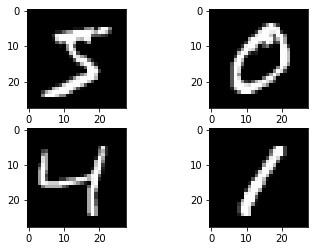

In [4]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2)
ax_1.imshow(train_X[0], 'gray')
ax_2.imshow(train_X[1], 'gray')
ax_3.imshow(train_X[2], 'gray')
ax_4.imshow(train_X[3], 'gray')

## Extracting features

Our dataset consists of 60,000 images 28x28. Here we need to reshape them into 768 columns (28 * 28), normalize values, and reduce dimensions 4 times. 

### Threesholding

In [5]:
X_norm, X_norm_test = train_X.copy(), test_X.copy()
X_norm[train_X >= 128] = 1
X_norm[train_X < 128] = 0
X_norm_test[test_X >= 128] = 1
X_norm_test[test_X < 128] = 0

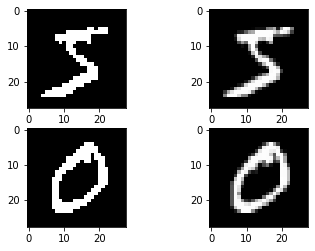

In [6]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2)
ax_1.imshow(X_norm[0], 'gray')
ax_2.imshow(train_X[0], 'gray')
ax_3.imshow(X_norm[1], 'gray')
ax_4.imshow(train_X[1], 'gray')

### Reshaping

In [7]:
def reshape_features(X):
    [rows, dim_x, dim_y] = X.shape
    return X.reshape((rows, (dim_x * dim_y)))

In [8]:
train_X, test_X = reshape_features(X_norm), reshape_features(X_norm_test)

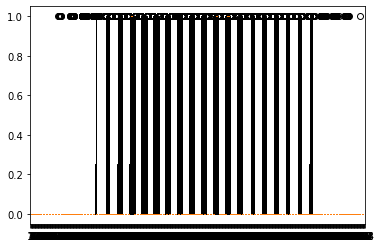

In [9]:
plt.boxplot(test_X[:100])

None

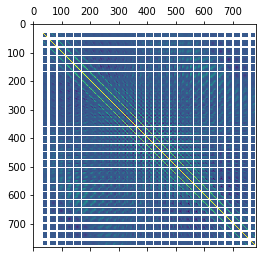

In [10]:
plt.matshow(pd.DataFrame(test_X).corr())
plt.show()

### Dimension reduction

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=(train_X.shape[1] // 4))

pca.fit(train_X)

PCA(n_components=196)

In [12]:
X_train, X_test = pca.transform(train_X), pca.transform(test_X)

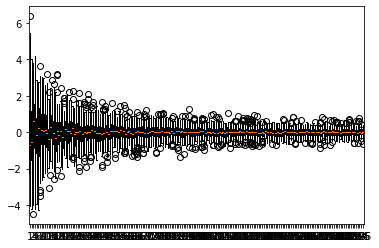

In [13]:
plt.boxplot(X_train[:100])

None

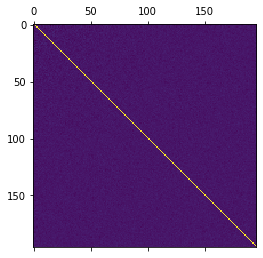

In [14]:
plt.matshow(pd.DataFrame(X_test).corr())
plt.show()

## Model training

We have 60,000 elements in dataset, but it's too much for SVC. That's why we randomly choose 5,000 rows for creating support vectors

In [15]:
def get_random_indices(X, n):
    indices = [i for i in range(X.shape[0])]
    np.random.shuffle(indices)
    return indices[:n]

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100],
}

gs = GridSearchCV(SVC(), params)

indices = get_random_indices(X_train, 5000)

gs.fit(X_train[indices, :], train_y[indices])

model = gs.best_estimator_

In [31]:
model

SVC(C=10, kernel='poly')

## Prediction and results analysis

In [28]:
pred_y = model.predict(X_test)

In [29]:
accurracy = np.sum(test_y == pred_y) / len(test_y)

In [19]:
def statistics_for_digit(digit):
    true_positive = np.sum(np.logical_and(test_y == digit, pred_y == digit))
    false_positive = np.sum(np.logical_and(test_y != digit, pred_y == digit))
    false_negative = np.sum(np.logical_and(test_y == digit, pred_y != digit))

    recall = true_positive / (true_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    return recall, precision

In [30]:
print(
    "Our results are following:",
    f"Accuraccy: {accurracy}",
    sep='\n'
)

Our results are following:
Accuraccy: 0.9563


In [21]:
for i in range(10):
    recall, precision = statistics_for_digit(i)
    print(f"Statistics for {i}",
          f"Recall: {recall}",
          f"Precision: {precision}",
          sep='\n',
          end='\n\n\n')

Statistics for 0
Recall: 0.9744897959183674
Precision: 0.9845360824742269


Statistics for 1
Recall: 0.9876651982378855
Precision: 0.9798951048951049


Statistics for 2
Recall: 0.9525193798449613
Precision: 0.9552964042759962


Statistics for 3
Recall: 0.9564356435643564
Precision: 0.9564356435643564


Statistics for 4
Recall: 0.9480651731160896
Precision: 0.9519427402862985


Statistics for 5
Recall: 0.9405829596412556
Precision: 0.9405829596412556


Statistics for 6
Recall: 0.9676409185803758
Precision: 0.9696652719665272


Statistics for 7
Recall: 0.9445525291828794
Precision: 0.9594861660079052


Statistics for 8
Recall: 0.9579055441478439
Precision: 0.9302093718843469


Statistics for 9
Recall: 0.9286422200198216
Precision: 0.9314115308151093


